In [2]:
!unzip /content/drive/MyDrive/brain_tumor/brain_tumor.zip -d /content/drive/MyDrive/brain_tumor


Archive:  /content/drive/MyDrive/brain_tumor/brain_tumor.zip
  inflating: /content/drive/MyDrive/brain_tumor/brain_tumor_dataset/no/1 no.jpeg  
  inflating: /content/drive/MyDrive/brain_tumor/brain_tumor_dataset/no/10 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor/brain_tumor_dataset/no/11 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor/brain_tumor_dataset/no/12 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor/brain_tumor_dataset/no/13 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor/brain_tumor_dataset/no/14 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor/brain_tumor_dataset/no/15 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor/brain_tumor_dataset/no/17 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor/brain_tumor_dataset/no/18 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor/brain_tumor_dataset/no/19 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor/brain_tumor_dataset/no/2 no.jpeg  
  inflating: /content/driv

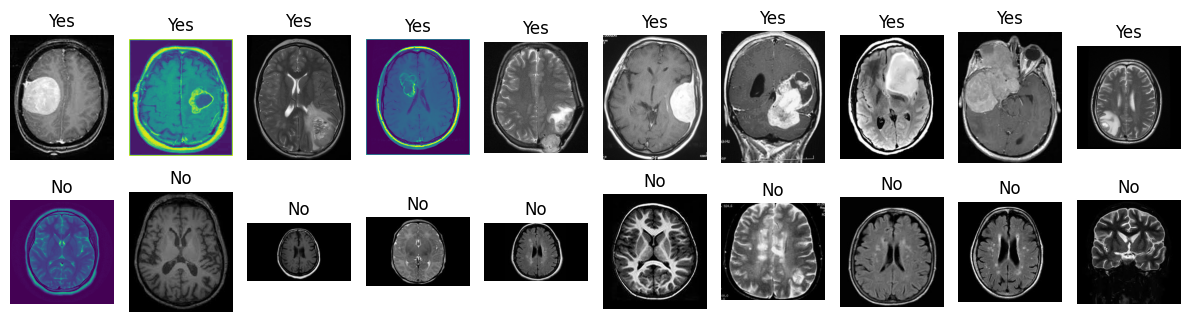

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# 경로 설정
train_dir = '/content/drive/MyDrive/brain_tumor/brain_tumor_dataset/'

yes_dir = os.path.join(train_dir, 'yes')
no_dir = os.path.join(train_dir, 'no')

# 각 클래스에서 첫 10개 이미지 파일 가져오기
yes_images = os.listdir(yes_dir)[:10]
no_images = os.listdir(no_dir)[:10]

# 이미지를 시각화하기 위한 설정
plt.figure(figsize=(12, 8))

# yes 클래스 이미지
for i, img_name in enumerate(yes_images):
    img_path = os.path.join(yes_dir, img_name)
    plt.subplot(5, 10, i + 1)
    plt.imshow(mpimg.imread(img_path))
    plt.axis('off')
    plt.title('Yes')

# no 클래스 이미지
for i, img_name in enumerate(no_images):
    img_path = os.path.join(no_dir, img_name)
    plt.subplot(5, 10, i + 11)
    plt.imshow(mpimg.imread(img_path))
    plt.axis('off')
    plt.title('No')

plt.tight_layout()
plt.show()

In [27]:
# ImageDataGenerator로 데이터 불러오기 (validation_split 설정)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20%를 검증 데이터로 사용
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [28]:
# 훈련용 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'        # 이진 분류
)

Found 253 images belonging to 2 classes.


In [29]:
# 모델 정의
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# VGG16 모델 불러오기 (사전 훈련된 가중치 사용)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # 기본 모델의 가중치는 고정


# 새로운 모델 정의
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 이진 분류이므로 sigmoid 사용
])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [31]:
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 조기 중단과 모델 체크포인트 설정
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='accuracy', mode='max')

# 모델 훈련
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 130s 18s/step - accuracy: 0.4712 - loss: 2.2044
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.5000 - loss: 1.9984 
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 183s 18s/step - accuracy: 0.5775 - loss: 1.6265
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.4688 - loss: 1.3696 
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 184s 18s/step - accuracy: 0.6451 - loss: 0.8420
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6562 - loss: 0.5425 
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 189s 18s/step - accuracy: 0.6374 - loss: 0.5527
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.7812 - loss: 0.4614
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 178s 18s/step - accuracy: 0.7173 - loss: 0.5632
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6562 - loss: 0.5670 
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 184s 18s/step - accuracy: 0.8051 - loss: 0.5002
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7188 - lo

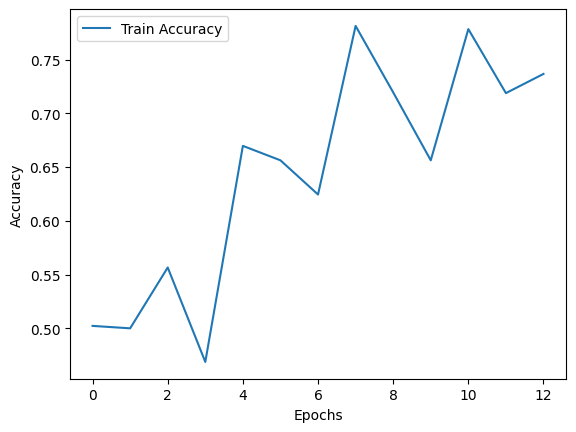

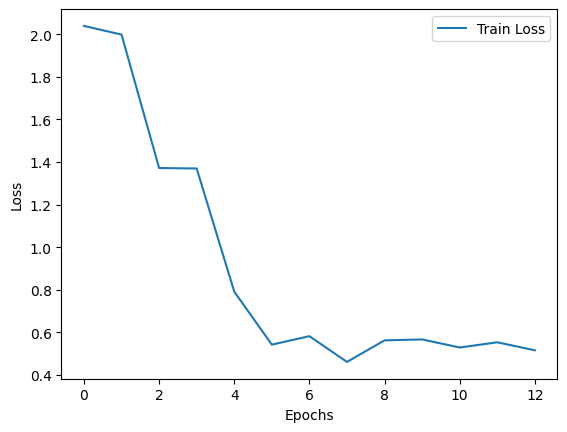

In [32]:
import matplotlib.pyplot as plt

# 정확도 그래프
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
